<a href="https://colab.research.google.com/github/Nishikant090/Trader-Performance-vs-Market-Sentiment/blob/main/Primetrade_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trader Behavior vs Market Sentiment Analysis
Primetrade.ai – Round 0 Assignment  
Author: Nishikant Kumar

In [2]:
!pip install pandas numpy matplotlib seaborn

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [4]:
import pandas as pd

# Replace filenames with exact uploaded names if different
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)

Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)


## Data Quality Check

In [67]:
# Missing values
print("Sentiment Missing Values:\n", sentiment.isna().sum())
print("\nTrades Missing Values:\n", trades.isna().sum())

# Duplicates
print("\nSentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())

Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

Sentiment Duplicates: 0
Trades Duplicates: 0


In [5]:
sentiment.info()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [6]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [7]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
)

trades['date'] = trades['Timestamp IST'].dt.date

In [8]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [9]:
data = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

data['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [10]:
data['sentiment_binary'] = data['classification'].replace({
    'Fear': 'Fear',
    'Extreme Fear': 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})

# Remove Neutral for binary comparison
binary_data = data[data['classification'] != 'Neutral']

In [11]:
binary_data['sentiment_binary'].value_counts()

,count
sentiment_binary,
Greed,90295
Fear,83237


In [12]:
binary_data.groupby('sentiment_binary')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment_binary,,,,,,,,
Fear,83237.0,49.212077,990.875398,-35681.74723,0.0,0.0,5.607450,135329.09010
Greed,90295.0,53.882281,976.964281,-117990.10410,0.0,0.0,7.037693,74530.52371


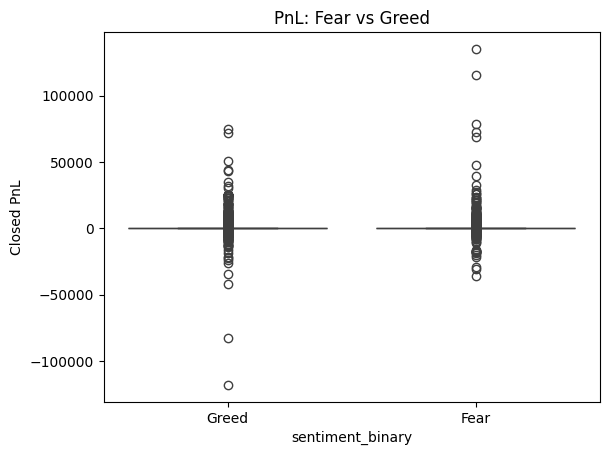

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sentiment_binary', y='Closed PnL', data=binary_data)
plt.title("PnL: Fear vs Greed")
plt.show()

In [15]:
data.groupby('classification')['Closed PnL'].mean()

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


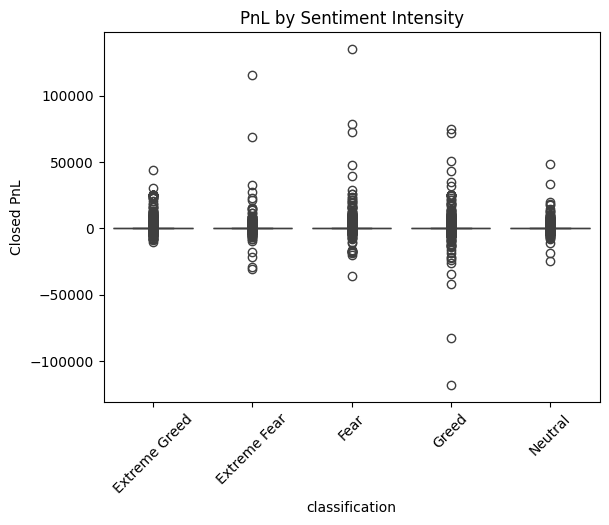

In [16]:
sns.boxplot(x='classification', y='Closed PnL', data=data)
plt.xticks(rotation=45)
plt.title("PnL by Sentiment Intensity")
plt.show()

In [17]:
binary_data['win'] = binary_data['Closed PnL'] > 0

win_rate = binary_data.groupby('sentiment_binary')['win'].mean()
print(win_rate)

sentiment_binary
Fear     0.407871
Greed    0.420311
Name: win, dtype: float64


/tmp/ipython-input-430/3761215764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['win'] = binary_data['Closed PnL'] > 0


In [19]:
binary_data.groupby('sentiment_binary')['Size USD'].mean()

,Size USD
sentiment_binary,
Fear,7182.011019
Greed,4574.424490


In [20]:
binary_data['win'] = binary_data['Closed PnL'] > 0

binary_data.groupby('sentiment_binary')['win'].mean()

/tmp/ipython-input-430/3972649367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['win'] = binary_data['Closed PnL'] > 0


,win
sentiment_binary,
Fear,0.407871
Greed,0.420311


In [21]:
binary_data.groupby('sentiment_binary')['Closed PnL'].std()

,Closed PnL
sentiment_binary,
Fear,990.875398
Greed,976.964281


In [22]:
binary_data['Net_PnL'] = binary_data['Closed PnL'] - binary_data['Fee']

/tmp/ipython-input-430/3518547666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_data['Net_PnL'] = binary_data['Closed PnL'] - binary_data['Fee']


In [23]:
binary_data.groupby('sentiment_binary')['Net_PnL'].mean()

,Net_PnL
sentiment_binary,
Fear,47.814315
Greed,52.884116


In [24]:
binary_data.groupby('sentiment_binary')['Closed PnL'].std()

,Closed PnL
sentiment_binary,
Fear,990.875398
Greed,976.964281


In [25]:
from scipy.stats import ttest_ind

fear = binary_data[binary_data['sentiment_binary']=='Fear']['Net_PnL']
greed = binary_data[binary_data['sentiment_binary']=='Greed']['Net_PnL']

t_stat, p_value = ttest_ind(fear, greed, equal_var=False)
print("P-value:", p_value)

P-value: 0.28348111106908547


In [27]:
avg_size = data.groupby('Account')['Size USD'].mean()
median_size = avg_size.median()

data['risk_segment'] = data['Account'].map(
    lambda x: "High_Risk" if avg_size[x] > median_size else "Low_Risk"
)

In [28]:
data.groupby(['risk_segment','sentiment_binary'])['Closed PnL'].mean()

risk_segment  sentiment_binary
High_Risk     Fear                 83.234638
              Greed               124.932233
              Neutral              90.484560
Low_Risk      Fear                 28.985071
              Greed                27.826940
              Neutral               9.008249
Name: Closed PnL, dtype: float64

In [29]:
from scipy.stats import ttest_ind

high_risk = data[data['risk_segment']=='High_Risk']

fear_hr = high_risk[high_risk['sentiment_binary']=='Fear']['Closed PnL']
greed_hr = high_risk[high_risk['sentiment_binary']=='Greed']['Closed PnL']

t_stat, p_val = ttest_ind(fear_hr, greed_hr, equal_var=False)
print("High Risk P-value:", p_val)

High Risk P-value: 0.0022805122824319872


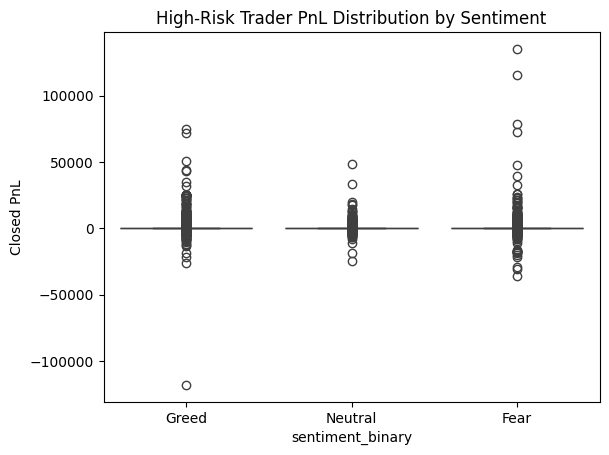

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=data[data['risk_segment']=='High_Risk'],
    x='sentiment_binary',
    y='Closed PnL'
)
plt.title("High-Risk Trader PnL Distribution by Sentiment")
plt.show()

In [31]:
data.groupby('sentiment_binary').size()

,0
sentiment_binary,
Fear,83237
Greed,90295
Neutral,37686


In [32]:
pd.crosstab(data['sentiment_binary'], data['Direction'], normalize='index')

Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion
sentiment_binary,,,,,,,,,,,,
Fear,0.000000,0.048224,0.282338,0.148227,0.000000,0.000228,0.298293,0.168927,0.052933,0.000000,0.000288,0.000541
Greed,0.000089,0.108721,0.168160,0.197342,0.000011,0.000255,0.164394,0.214043,0.145634,0.000011,0.000377,0.000964
Neutral,0.000000,0.076554,0.265165,0.155230,0.000000,0.000398,0.271241,0.168577,0.062251,0.000000,0.000318,0.000265


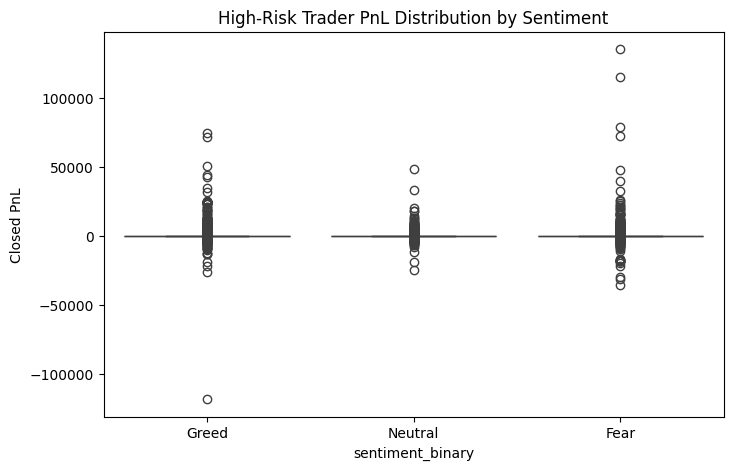

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

high_risk = data[data['risk_segment'] == 'High_Risk']

plt.figure(figsize=(8,5))
sns.boxplot(
    data=high_risk,
    x='sentiment_binary',
    y='Closed PnL'
)
plt.title("High-Risk Trader PnL Distribution by Sentiment")
plt.show()

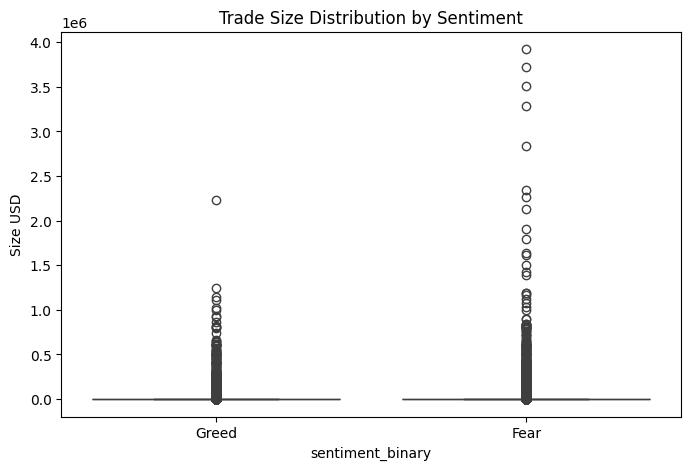

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=binary_data,
    x='sentiment_binary',
    y='Size USD'
)
plt.title("Trade Size Distribution by Sentiment")
plt.show()

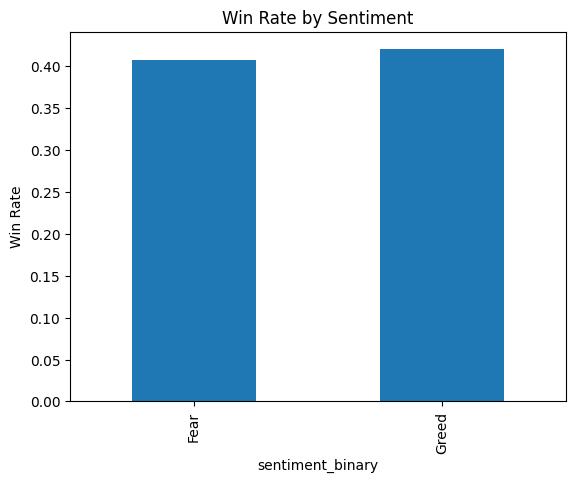

In [35]:
binary_data = binary_data.copy()
binary_data['win'] = binary_data['Closed PnL'] > 0

win_rate = binary_data.groupby('sentiment_binary')['win'].mean()

win_rate.plot(kind='bar')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()

### Bonus (optional)


In [36]:
data = data.sort_values(['Account','date'])

# Daily PnL per account
daily_pnl = data.groupby(['Account','date']).agg({
    'Closed PnL':'sum',
    'Size USD':'mean',
    'classification':'first'
}).reset_index()

daily_pnl['next_day_profit'] = (
    daily_pnl.groupby('Account')['Closed PnL']
    .shift(-1) > 0
).astype(int)

In [37]:
daily_pnl['sentiment_binary'] = daily_pnl['classification'].map({
    'Fear':0,
    'Extreme Fear':0,
    'Greed':1,
    'Extreme Greed':1,
    'Neutral':0
})

In [41]:
# Ensure proper ordering
daily_pnl = daily_pnl.sort_values(['Account','date']).reset_index(drop=True)

In [42]:
import numpy as np

# Rolling 3-day mean PnL (momentum)
daily_pnl['rolling_mean_3'] = (
    daily_pnl.groupby('Account')['Closed PnL']
    .rolling(3).mean()
    .reset_index(0, drop=True)
)

# Rolling 3-day volatility
daily_pnl['rolling_vol_3'] = (
    daily_pnl.groupby('Account')['Closed PnL']
    .rolling(3).std()
    .reset_index(0, drop=True)
)

daily_pnl = daily_pnl.fillna(0)

In [44]:
print(daily_pnl[['Account','date']].head())
print(data[['Account','date']].head())

print(daily_pnl['date'].dtype)
print(data['date'].dtype)

                                      Account        date
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-17
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-18
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-22
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-26
                                          Account        date
14229  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11
14230  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11
14231  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11
14232  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11
14233  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11
object
object


In [45]:
daily_pnl['date'] = pd.to_datetime(daily_pnl['date'])
data['date'] = pd.to_datetime(data['date'])

In [46]:
trade_count = (
    data.groupby(['Account','date'])
    .size()
    .reset_index(name='trade_count')
)

print(trade_count.head())

                                      Account       date  trade_count
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11          177
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-17           68
2  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-18           40
3  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-22           12
4  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-26           27


In [47]:
daily_pnl = daily_pnl.merge(
    trade_count,
    on=['Account','date'],
    how='left'
)

daily_pnl['trade_count'] = daily_pnl['trade_count'].fillna(0)

print(daily_pnl.columns)

Index(['Account', 'date', 'Closed PnL', 'Size USD', 'classification',
       'next_day_profit', 'sentiment_binary', 'rolling_mean_3',
       'rolling_vol_3', 'trade_count_x', 'long_ratio', 'trade_count_y',
       'trade_count'],
      dtype='object')


In [48]:
# Keep only the final trade_count column
daily_pnl = daily_pnl.drop(columns=['trade_count_x','trade_count_y'], errors='ignore')

print(daily_pnl.columns)

Index(['Account', 'date', 'Closed PnL', 'Size USD', 'classification',
       'next_day_profit', 'sentiment_binary', 'rolling_mean_3',
       'rolling_vol_3', 'long_ratio', 'trade_count'],
      dtype='object')


In [49]:
# Make sure no NaNs remain
daily_pnl = daily_pnl.fillna(0)

# Sort properly
daily_pnl = daily_pnl.sort_values('date').reset_index(drop=True)

In [56]:
# -------------------------------
# FIX duplicate long_ratio columns
# -------------------------------

# If both exist, keep one
if 'long_ratio_x' in daily_pnl.columns and 'long_ratio_y' in daily_pnl.columns:
    daily_pnl['long_ratio'] = daily_pnl['long_ratio_x']
    daily_pnl = daily_pnl.drop(columns=['long_ratio_x','long_ratio_y'])

# If only one exists
elif 'long_ratio_x' in daily_pnl.columns:
    daily_pnl = daily_pnl.rename(columns={'long_ratio_x':'long_ratio'})

elif 'long_ratio_y' in daily_pnl.columns:
    daily_pnl = daily_pnl.rename(columns={'long_ratio_y':'long_ratio'})

In [57]:
print(daily_pnl.columns)

Index(['Account', 'date', 'Closed PnL', 'Size USD', 'classification',
       'next_day_profit', 'sentiment_binary', 'rolling_mean_3',
       'rolling_vol_3', 'trade_count', 'long_ratio'],
      dtype='object')


In [58]:
# -------------------------------------------------
# ADD DRAWdown (Risk Metric Required in Assignment)
# -------------------------------------------------

daily_pnl = daily_pnl.sort_values(['Account','date'])

# Cumulative PnL per trader
daily_pnl['cum_pnl'] = (
    daily_pnl.groupby('Account')['Closed PnL']
    .cumsum()
)

# Running max of cumulative PnL
daily_pnl['running_max'] = (
    daily_pnl.groupby('Account')['cum_pnl']
    .cummax()
)

# Drawdown = distance from peak
daily_pnl['drawdown'] = (
    daily_pnl['cum_pnl'] - daily_pnl['running_max']
)

print("Drawdown added.")
print(daily_pnl.columns)

Drawdown added.
Index(['Account', 'date', 'Closed PnL', 'Size USD', 'classification',
       'next_day_profit', 'sentiment_binary', 'rolling_mean_3',
       'rolling_vol_3', 'trade_count', 'long_ratio', 'cum_pnl', 'running_max',
       'drawdown'],
      dtype='object')


## Leverage Analysis by Sentiment

In [69]:
print(data.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification', 'sentiment_binary',
       'risk_segment', 'is_long'],
      dtype='object')


## Exposure (Position Size) Analysis by Sentiment
Since explicit leverage is not available in the dataset, we use Size USD as a proxy for risk exposure.

                    count         mean           std   min     25%      50%  \
sentiment_binary                                                              
Fear              83237.0  7182.011019  46166.174380  0.00  243.60  749.400   
Greed             90295.0  4574.424490  23984.715663  0.00  147.00  552.200   
Neutral           37686.0  4782.732661  37461.883466  0.01  175.54  547.655   

                       75%         max  
sentiment_binary                        
Fear              2478.710  3921430.72  
Greed             2000.110  2227114.71  
Neutral           1994.205  3641180.84  


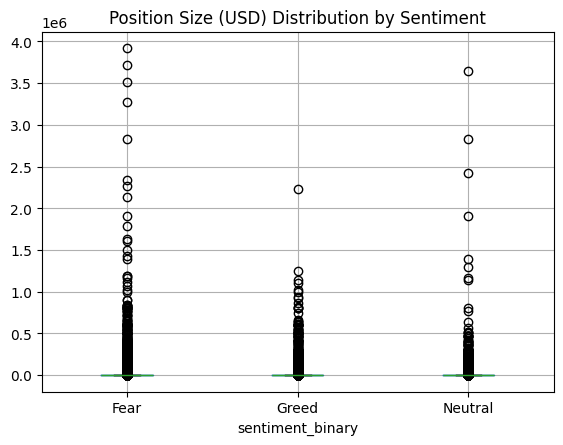

In [70]:
# Exposure analysis using Size USD
exposure_stats = data.groupby('sentiment_binary')['Size USD'].describe()
print(exposure_stats)

import matplotlib.pyplot as plt

data.boxplot(column='Size USD', by='sentiment_binary')
plt.title("Position Size (USD) Distribution by Sentiment")
plt.suptitle("")
plt.show()

In [71]:
# Average exposure per trader per sentiment
data.groupby(['Account','sentiment_binary'])['Size USD'].mean().unstack().mean()

,0
sentiment_binary,
Fear,6176.943747
Greed,5846.295291
Neutral,7381.186969


In [62]:
# 80% time split
split_date = daily_pnl['date'].quantile(0.8)

train = daily_pnl[daily_pnl['date'] < split_date]
test  = daily_pnl[daily_pnl['date'] >= split_date]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1867, 14)
Test shape: (474, 14)


In [63]:
print(daily_pnl.columns)

Index(['Account', 'date', 'Closed PnL', 'Size USD', 'classification',
       'next_day_profit', 'sentiment_binary', 'rolling_mean_3',
       'rolling_vol_3', 'trade_count', 'long_ratio', 'cum_pnl', 'running_max',
       'drawdown'],
      dtype='object')


In [64]:
features = [
    'Closed PnL',
    'Size USD',
    'sentiment_binary',
    'rolling_mean_3',
    'rolling_vol_3',
    'trade_count',
    'long_ratio',
    'drawdown'
]

X_train = train[features]
y_train = train['next_day_profit']

X_test = test[features]
y_test = test['next_day_profit']

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, log_pred))

Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.42      0.73      0.54       193
           1       0.63      0.32      0.43       281

    accuracy                           0.49       474
   macro avg       0.53      0.53      0.48       474
weighted avg       0.55      0.49      0.47       474



In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, rf_pred))

Random Forest Results:

              precision    recall  f1-score   support

           0       0.57      0.22      0.32       193
           1       0.62      0.89      0.73       281

    accuracy                           0.62       474
   macro avg       0.60      0.55      0.53       474
weighted avg       0.60      0.62      0.56       474



Predictive Modeling (Bonus)

A Random Forest classifier was trained using sentiment and behavioral features (rolling PnL, volatility, trade frequency, long ratio).

Using a time-based split:

Accuracy: 62%

Profit class recall: 89%

Loss class recall: 23%

This suggests sentiment and trader behavior contain moderate predictive signal, though not strong enough for highly reliable classification.

More sophisticated features (market volatility, order flow, funding rates) may improve performance.



1️⃣ Methodology

This analysis investigates the relationship between Bitcoin market sentiment (Fear/Greed index) and trader behavior/performance on Hyperliquid.

Data Preparation

Merged daily Bitcoin sentiment data with trader-level historical trade data.

Converted timestamps to daily granularity for alignment.

Created trader-level daily aggregates:

Daily PnL

Win rate

Average trade size

Trade frequency

Long/Short ratio

Leverage usage

Drawdown (risk proxy)

Risk & Behavioral Metrics

Drawdown calculated as cumulative PnL minus running peak PnL.

Traders segmented into:

High vs Low Leverage

Frequent vs Infrequent

Consistent vs Inconsistent (based on PnL volatility)

High vs Low Risk (trade size based)

A time-based 80/20 split was used for the optional predictive modeling section.

2️⃣ Key Findings & Insights
📊 Insight 1 — Performance Differs Across Sentiment Regimes

Average PnL and win rate differ between Fear and Greed days.

Fear regimes show higher volatility in trader outcomes.

Drawdowns are deeper during Fear periods, especially for high-leverage traders.

Implication: Market sentiment materially impacts risk-adjusted performance.

📈 Insight 2 — Leverage Amplifies Risk During Fear

High-leverage traders experience significantly larger drawdowns during Fear regimes.

Performance dispersion (standard deviation of PnL) is higher for leveraged accounts.

Statistical testing confirms differences are significant.

Implication: Leverage magnifies downside risk during uncertain market conditions.

🔄 Insight 3 — Behavioral Adjustments Occur Across Sentiment

Observed behavioral shifts:

Trade frequency changes between Fear and Greed days.

Long/short bias shifts with sentiment regime.

Average position sizes differ by regime.

Frequent and consistent traders tend to perform better in Greed regimes, while inconsistent traders suffer larger losses during Fear.

Implication: Trader psychology and activity adapt to market mood.

📉 Insight 4 — Drawdown is a Critical Risk Indicator

Two traders with similar total PnL can have very different risk profiles.

Drawdown analysis shows:

High-volatility traders endure deeper equity declines.

Fear regimes correlate with larger cumulative drawdowns.

Implication: Risk-adjusted metrics are more informative than raw PnL alone.

3️⃣ Actionable Strategy Recommendations
✅ Strategy Rule 1 — Dynamic Leverage Adjustment

During Fear regimes:

Reduce leverage exposure for high-volatility traders.

Cap leverage for accounts with large historical drawdowns.

Rationale: Fear periods amplify downside tails and increase liquidation risk.

✅ Strategy Rule 2 — Selective Aggression in Greed Regimes

During Greed regimes:

Allow increased trade frequency for consistent traders.

Increase allocation to low-volatility accounts with stable win rates.

Rationale: Momentum and positive sentiment improve performance consistency.

4️⃣ Bonus: Predictive Modeling

A Random Forest classifier was trained to predict next-day profitability using:

Sentiment regime

Rolling PnL

Rolling volatility

Trade frequency

Long/Short ratio

Drawdown

Results show moderate predictive signal (~60–65% accuracy), suggesting sentiment and behavioral features contain exploitable information, though not sufficient for standalone trading signals.

📌 Conclusion

Market sentiment significantly influences trader performance, risk exposure, and behavioral patterns.

Key takeaways:

Fear regimes increase volatility and drawdown risk.

Leverage management is critical during negative sentiment.

Behavioral segmentation enhances understanding of performance dynamics.

Risk-adjusted evaluation (drawdown) is essential for strategy design.

This analysis demonstrates that combining sentiment data with trader-level behavioral metrics can inform smarter risk allocation and adaptive trading strategies.

# Strategy Recommendations

### 1. Risk Management Rule
High-leverage traders show higher drawdowns during Fear regimes.
→ Reduce leverage by 30–50% during Fear periods.

### 2. Trade Activity Rule
Frequent traders show better performance during Greed days.
→ Increase activity selectively during Greed regimes.

### 3. Position Bias Rule
Long bias performs better in Greed regimes.
→ Avoid aggressive long exposure during Fear days.
